In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import h5py
import math
%matplotlib inline

In [129]:
df = h5py.File('Z:/gait_database/full_preprocesed_bez_plyt.h5', 'r')

In [130]:
print(list(df.keys()))

['x', 'y_features', 'y_move', 'y_person']


In [131]:
x = df['x'][:,:,:]
y = df['y_move']

In [132]:
print('(samples, timesteps, features) (samples,label) -> ', x.shape, y.shape)

(samples, timesteps, features) (samples,label) ->  (3185, 425, 208) (3185, 1)


In [133]:
x.shape, y.shape

((3185, 425, 208), (3185, 1))

In [134]:
nsamples, nx, ny = x.shape
d2_x = x.reshape((nsamples,nx*ny))

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(d2_x)
scaled_data = scaler.transform(d2_x)

In [136]:
scaled_data.shape

(3185, 88400)

In [137]:
scaled_data

array([[-0.22706302, -0.74978213, -0.11923335, ..., -1.395679  ,
        -0.88834669, -0.45536648],
       [-0.66778314, -0.82333559, -0.47434019, ..., -1.30683891,
        -0.96084545, -0.08939058],
       [-0.24521482, -0.91750892, -0.41402737, ..., -0.74094464,
        -0.81508869, -0.33423526],
       ...,
       [ 1.79480481,  1.84756449, -0.34059038, ..., -1.11843719,
        -0.76921471, -0.42853537],
       [ 1.45118968,  1.96888316, -0.52772793, ..., -1.31963281,
        -1.00382151,  1.24646504],
       [ 1.36643654,  1.65563546, -0.59789356, ..., -0.51201401,
        -0.33080614, -0.37842326]])

In [146]:
scaled_data[:] = np.nan_to_num(scaled_data)

In [147]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3185) # liczba głównych składowych
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_new = pca.inverse_transform(x_pca)
print("original shape:   ", scaled_data.shape)
print("transformed shape:", x_pca.shape)

original shape:    (3185, 88400)
transformed shape: (3185, 3185)


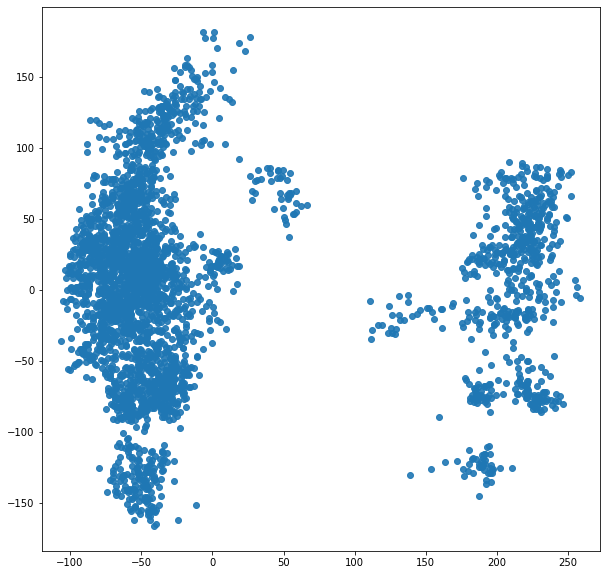

In [162]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.9)
# plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.1)
plt.axis('equal');

Text(0, 0.5, 'Second Principal Component')

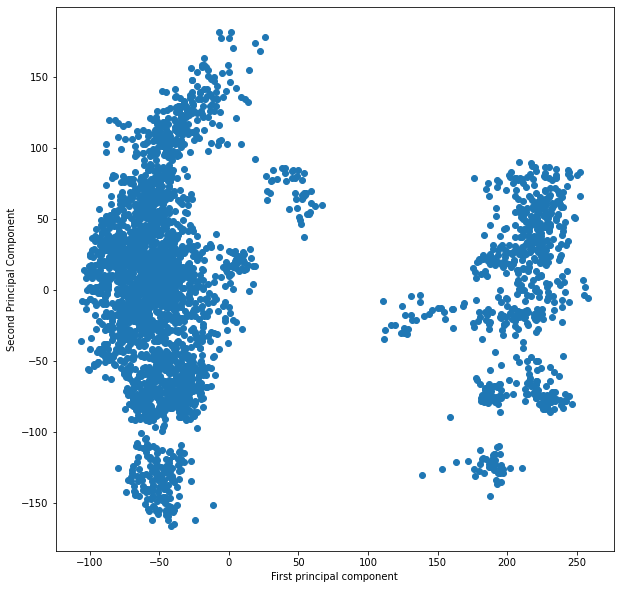

In [155]:
plt.figure(figsize=(10,10))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [165]:
pca.components_

array([[ 0.00846124,  0.0075874 , -0.00075447, ..., -0.00087081,
        -0.00090892,  0.00136   ],
       [ 0.00145737,  0.00354726,  0.0094492 , ..., -0.00166535,
        -0.00393194, -0.00290176],
       [-0.00069219, -0.00088721, -0.00731596, ...,  0.00045248,
         0.00396653,  0.0043556 ],
       ...,
       [-0.00147022,  0.00079919, -0.0045649 , ..., -0.00389273,
         0.00729106, -0.00108618],
       [ 0.01027613, -0.00073146, -0.00085609, ...,  0.00388693,
        -0.00502677,  0.00214638],
       [-0.00196982,  0.00643029, -0.00204786, ...,  0.00198593,
        -0.00132364, -0.00120656]])

In [166]:
# map = pd.DataFrame(pca.components_,columns=x_pca)
# plt.figure(figsize=10)
# sns.heatmap(map,cmap='twilight')

ValueError: Index data must be 1-dimensional